In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dill
import numpy as np
import matplotlib.pyplot as plt
from ptychoSampling.utils.utils import getRandomComplexArray
from ptychoSampling.farfield.run_methods.sim_methods import Simulation
from ptychoSampling.probe import EllipticalProbe
import ptychoSampling.farfield.run_methods.utils as utils  

In [3]:
# Whether to reload existing simulation data (if available) or to create new data
reload_simulation = True
base_path = './'

In [4]:
probe_params={'n_photons':1e4}
poisson_noise = True

In [5]:
# To save simulation for reuse.

items = ["obj", "probe", "scan_grid", "intensities"]
sim_items = {}
if reload_simulation:
    try:
        for name in items:
            with open(f"{base_path}{name}.pkl", 'rb') as f:
                value = dill.load(f)
                sim_items[name] = value
        print("Loaded successfully")
    except:
        sim = Simulation(probe_params=probe_params, poisson_noise=poisson_noise)
        for name in items:
            value = sim.__dict__[name]
            with open(f'{base_path}{name}.pkl', 'wb') as f:
                dill.dump(value, f, byref=False)
            sim_items[name] = value
        print("Regenerated data.")
else:
    sim = Simulation(probe_params=probe_params, poisson_noise=poisson_noise)
    for name in items:
        value = sim.__dict__[name]
        sim_items[name] = value

Regenerated data.


In [6]:
!ls $base_path

intensities.pkl  recons_spr_gaussian.ipynb  simulation.ipynb
obj.pkl		 recons_spr_poisson.ipynb
probe.pkl	 scan_grid.pkl


In [7]:
# Scan positions
sim_items['scan_grid'].positions_pix

array([[  0,   0],
       [  0,   5],
       [  0,  10],
       ...,
       [155, 145],
       [155, 150],
       [155, 155]])

23.739221231607164 0.008918227647497265 10000.0 87


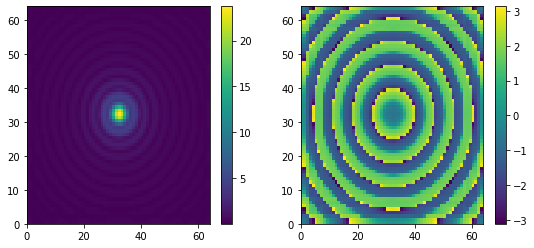

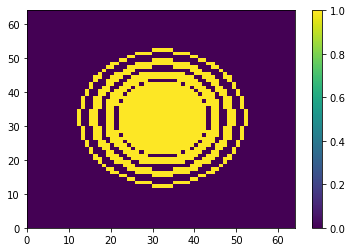

In [8]:
print(np.abs(sim_items["probe"].wavefront).max(), np.abs(sim_items["probe"].wavefront).min(), sim_items["probe"].n_photons, sim_items["intensities"].max())

plt.figure(figsize=[9,4])
plt.subplot(1,2,1)
plt.pcolormesh(np.abs(sim_items["probe"].wavefront.fftshift))
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(np.angle(sim_items["probe"].wavefront.fftshift))
plt.colorbar()
plt.show()

probe_box = np.abs(sim_items["probe"].wavefront.fftshift)
probe_box[probe_box < 0.5] = 0
probe_box[probe_box > 0] = 1
plt.pcolormesh(probe_box)
plt.colorbar()
plt.show()

1.0 0.0


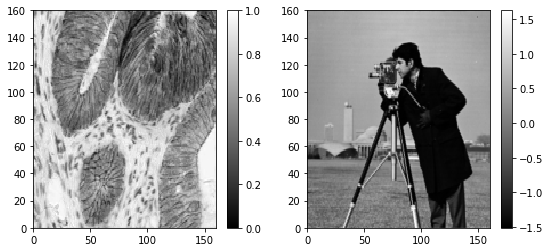

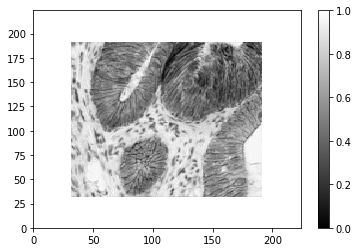

In [9]:
print(np.abs(sim_items["obj"].array).max(), np.abs(sim_items["obj"].array).min())

# Showing juust the object
plt.figure(figsize=[9,4])
plt.subplot(1,2,1)
plt.pcolormesh(np.abs(sim_items["obj"].array), cmap='gray')
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(np.angle(sim_items["obj"].array), cmap='gray')
plt.colorbar()
plt.show()

# Showing the object and the bounding (1-padded) box around it
obj_box = np.abs(sim_items["obj"].bordered_array)
plt.pcolormesh(obj_box, cmap='gray')
plt.colorbar()
plt.show()